In [1]:
!nvidia-smi

Sat Dec 28 23:30:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   38C    P8              4W /   50W |     810MiB /   6144MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
import tensorflow as tf

In [17]:
print(tf.__version__)

2.18.0


In [131]:
import os
import shutil
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten

def split_dataset(input_dir, output_dir, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1):
    """
    Splits a dataset of subclasses into train, test, and validation sets.

    Args:
        input_dir (str): Path to the input dataset directory. The directory should contain subdirectories for each class.
        output_dir (str): Path to the output directory where the split datasets will be stored.
        train_ratio (float): Proportion of the data to include in the training set (default is 0.8).
        test_ratio (float): Proportion of the data to include in the test set (default is 0.1).
        val_ratio (float): Proportion of the data to include in the validation set (default is 0.1).

    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create subdirectories for train, test, and validation
    for split in ['train', 'test', 'val']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    # Iterate over each subclass
    for subclass in os.listdir(input_dir):
        subclass_path = os.path.join(input_dir, subclass)
        if not os.path.isdir(subclass_path):
            continue

        # Get all files in the subclass directory
        files = os.listdir(subclass_path)

        # Split files into train, test, and validation
        train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
        val_size = val_ratio / (test_ratio + val_ratio)
        test_files, val_files = train_test_split(temp_files, test_size=val_size, random_state=42)

        # Copy files to the respective directories
        for split, split_files in zip(['train', 'test', 'val'], [train_files, test_files, val_files]):
            split_subclass_dir = os.path.join(output_dir, split, subclass)
            os.makedirs(split_subclass_dir, exist_ok=True)
            for file in split_files:
                shutil.copy(os.path.join(subclass_path, file), os.path.join(split_subclass_dir, file))

    print("Dataset successfully split into train, test, and validation sets.")

# Example usage
input_directory = r"C:\Users\Saurav\Documents\PlantSpeciesFlower\flowerImagesDataset\Flowers299"
output_directory = r"C:\Users\Saurav\Documents\PlantSpeciesFlower\flowerImagesDataset\output_images"
split_dataset(input_directory, output_directory)

# Example of defining a simple Sequential model
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Example input shape for image data


Dataset successfully split into train, test, and validation sets.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Directories for train, validation, and test datasets
train_dir = r"C:\Users\Saurav\Documents\PlantSpeciesFlower\Output_images\train"
val_dir = r"C:\Users\Saurav\Documents\PlantSpeciesFlower\Output_images\val"
test_dir = r"C:\Users\Saurav\Documents\PlantSpeciesFlower\Output_images\test"
# Parameters
img_height, img_width = 150, 150
batch_size = 32
num_classes = 9
epochs = 25

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)




Found 37417 images belonging to 9 classes.
Found 4681 images belonging to 9 classes.
Found 4678 images belonging to 9 classes.


C:\Users\Saurav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,513 (18.42 MB)

 Trainable params: 4,829,513 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 233s 198ms/step - accuracy: 0.3918 - loss: 1.6310 - val_accuracy: 0.6232 - val_loss: 1.0180
Epoch 2/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 199s 170ms/step - accuracy: 0.5842 - loss: 1.1506 - val_accuracy: 0.6723 - val_loss: 0.9414
Epoch 3/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 199s 170ms/step - accuracy: 0.6421 - loss: 1.0045 - val_accuracy: 0.7330 - val_loss: 0.7398
Epoch 4/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 208s 177ms/step - accuracy: 0.6812 - loss: 0.9037 - val_accuracy: 0.7678 - val_loss: 0.6460
Epoch 5/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 250s 213ms/step - accuracy: 0.7137 - loss: 0.8107 - val_accuracy: 0.7917 - val_loss: 0.6081
Epoch 6/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 244s 208ms/step - accuracy: 0.7378 - loss: 0.7455 - val_accuracy: 0.8199 - val_loss: 0.5076
Epoch 7/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 241s 205ms/step - accuracy: 0.7600 - loss: 0.6873 - val_accuracy: 0.8086 - val_loss: 0.5461
Epoch 8/25
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 241s 206ms/step - ac

In [73]:

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


147/147 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9073 - loss: 0.2860
Test Accuracy: 90.08%


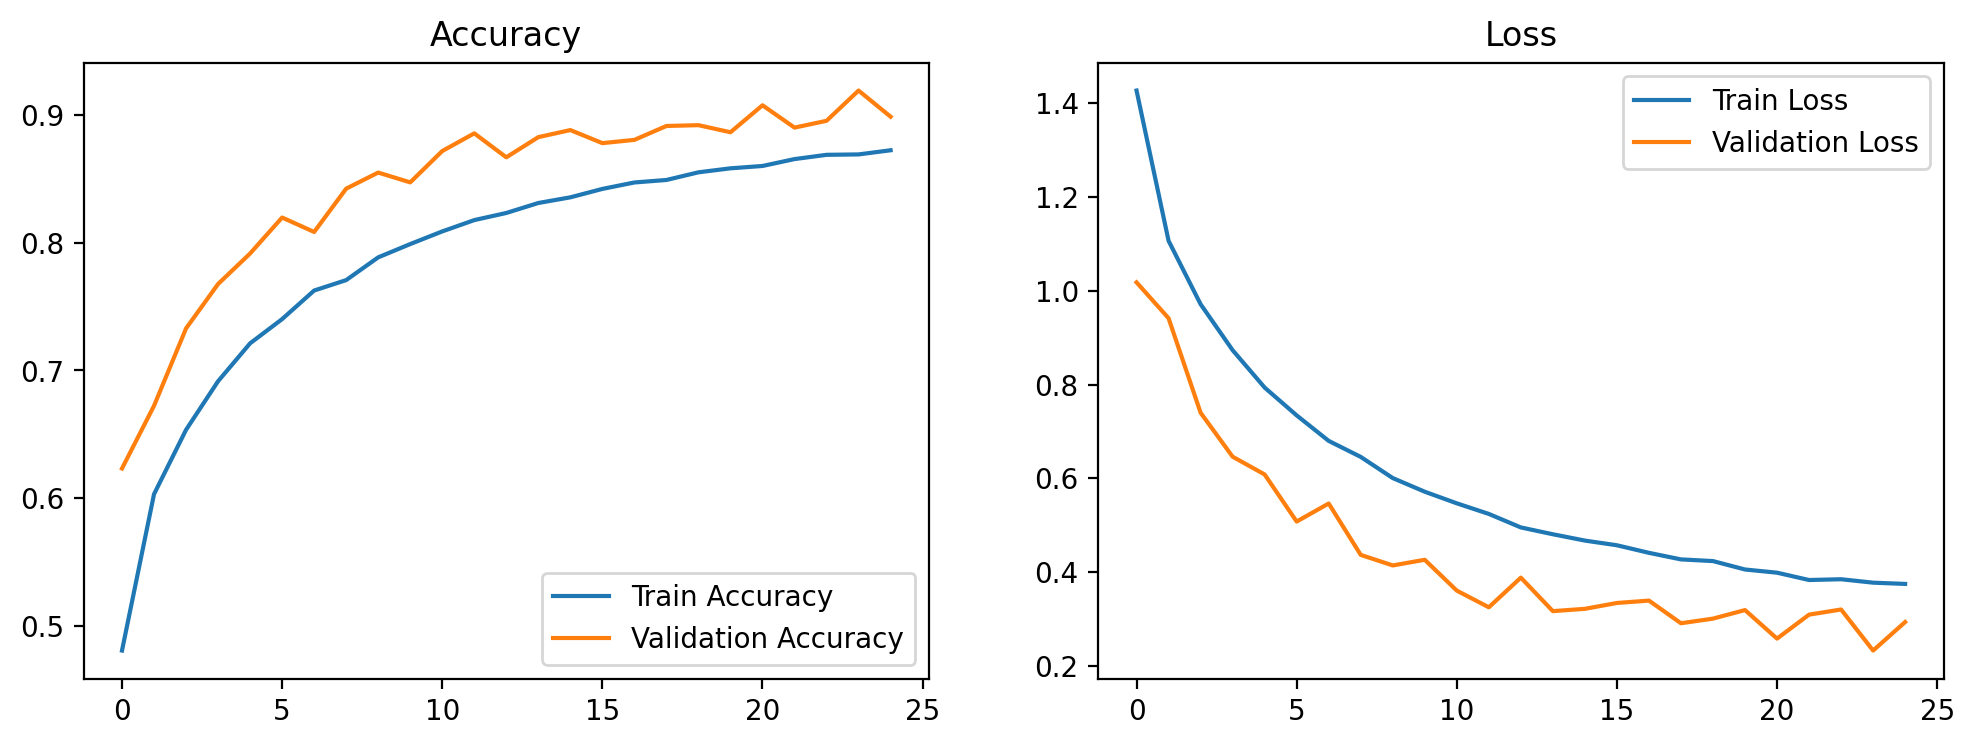

In [75]:

# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()



In [ ]:
# Save the Model
model.save('flower_classifier_model.h5')

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('flower_classifier_model.h5')

# Parameters
img_height, img_width = 150, 150
class_labels = [
    'bougainvillea', 'daisy', 'dandelion', 'frangipani', 'hibiscus',
    'rose', 'sunflower', 'tulips', 'zinnia'
]

# Function to predict an image
def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100

    # Display the image and prediction
    plt.imshow(plt.imread(image_path))
    plt.axis('off')  # Turn off the axes
    plt.title(f"{class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()

    # Output the result
    print(f"Predicted Class: {class_labels[predicted_class]} with {confidence:.2f}% confidence.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


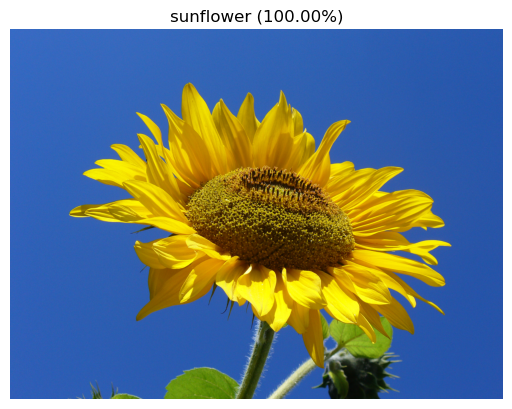

Predicted Class: sunflower with 100.00% confidence.


In [2]:
image_path = r"C:\Users\Saurav\Documents\PlantSpeciesFlower\Sunflower.jpg" 
predict_image(image_path)